<a href="https://colab.research.google.com/github/kakkia/final_project/blob/main/tf_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image classification from TensorFlow documentation 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [18]:
import pathlib
data = "/content/drive/MyDrive/dataset"
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data)

In [19]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1007


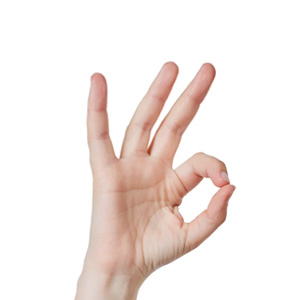

In [15]:
perfect = list(data_dir.glob('perfect/*'))
PIL.Image.open(str(perfect[0]))


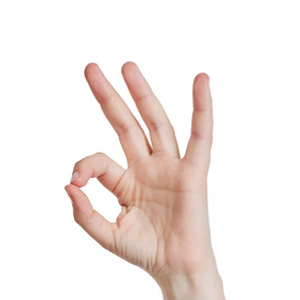

In [16]:
PIL.Image.open(str(perfect[1]))

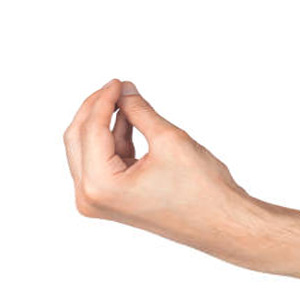

In [17]:
what = list(data_dir.glob('what/*'))
PIL.Image.open(str(what[0]))


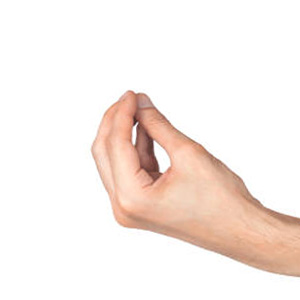

In [18]:
PIL.Image.open(str(what[3]))


In [20]:
batch_size = 32
img_height = 180
img_width = 180

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1007 files belonging to 3 classes.
Using 806 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1007 files belonging to 3 classes.
Using 201 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['perfect', 'shoo', 'what']


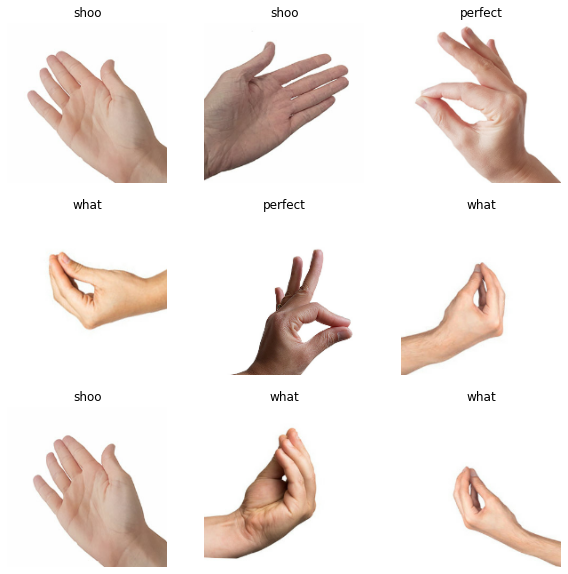

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [26]:
normalization_layer = layers.Rescaling(1./255)

In [27]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [30]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
26/26 [==============================] - 80s 818ms/step - loss: 1.4649 - accuracy: 0.3722 - val_loss: 1.0708 - val_accuracy: 0.4677
Epoch 2/10
26/26 [==============================] - 1s 47ms/step - loss: 0.9230 - accuracy: 0.6017 - val_loss: 0.7934 - val_accuracy: 0.6915
Epoch 3/10
26/26 [==============================] - 1s 45ms/step - loss: 0.5921 - accuracy: 0.7618 - val_loss: 0.6309 - val_accuracy: 0.7164
Epoch 4/10
26/26 [==============================] - 1s 45ms/step - loss: 0.4313 - accuracy: 0.8412 - val_loss: 0.5300 - val_accuracy: 0.7910
Epoch 5/10
26/26 [==============================] - 1s 45ms/step - loss: 0.2454 - accuracy: 0.9169 - val_loss: 0.4024 - val_accuracy: 0.8408
Epoch 6/10
26/26 [==============================] - 1s 44ms/step - loss: 0.1369 - accuracy: 0.9578 - val_loss: 0.4142 - val_accuracy: 0.8209
Epoch 7/10
26/26 [==============================] - 1s 45ms/step - loss: 0.1098 - accuracy: 0.9603 - val_loss: 0.3733 - val_accuracy: 0.8557
Epoch 8/10


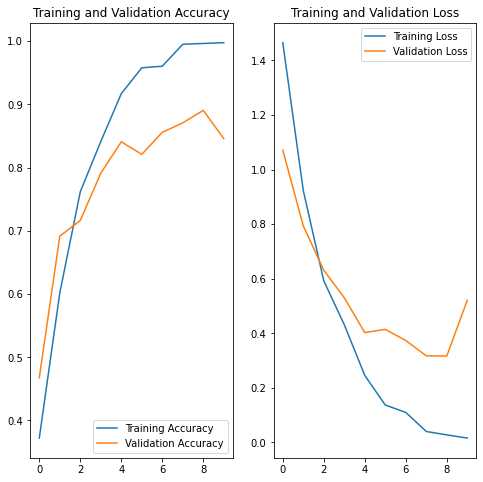

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [32]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

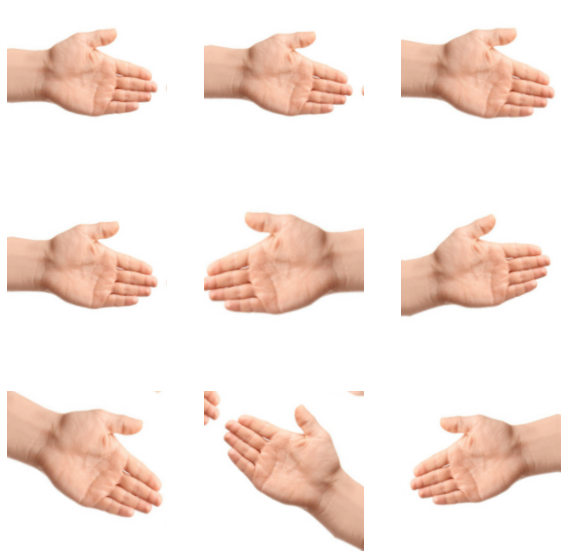

In [33]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [34]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [36]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [37]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
26/26 [==============================] - 3s 60ms/step - loss: 1.1296 - accuracy: 0.3759 - val_loss: 1.1669 - val_accuracy: 0.3383
Epoch 2/15
26/26 [==============================] - 1s 51ms/step - loss: 1.0411 - accuracy: 0.5000 - val_loss: 0.9312 - val_accuracy: 0.5473
Epoch 3/15
26/26 [==============================] - 1s 50ms/step - loss: 0.8834 - accuracy: 0.5769 - val_loss: 0.7689 - val_accuracy: 0.6517
Epoch 4/15
26/26 [==============================] - 1s 50ms/step - loss: 0.6847 - accuracy: 0.6898 - val_loss: 0.5917 - val_accuracy: 0.7114
Epoch 5/15
26/26 [==============================] - 1s 50ms/step - loss: 0.5946 - accuracy: 0.7531 - val_loss: 1.0181 - val_accuracy: 0.6965
Epoch 6/15
26/26 [==============================] - 1s 50ms/step - loss: 0.4959 - accuracy: 0.7792 - val_loss: 0.4251 - val_accuracy: 0.8806
Epoch 7/15
26/26 [==============================] - 1s 51ms/step - loss: 0.3835 - accuracy: 0.8437 - val_loss: 0.4017 - val_accuracy: 0.8408
Epoch 8/15
26

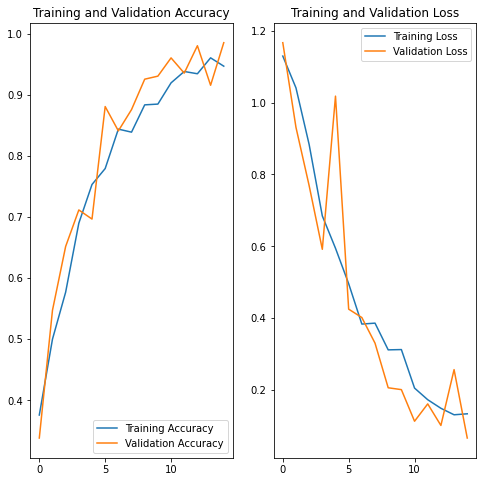

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
predict = "/content/drive/MyDrive/predictions/1predict.jpeg"
#predict_path = tf.keras.utils.get_file('predict_perfect', origin=predict_url)

img = tf.keras.utils.load_img(
    predict, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to what with a 100.00 percent confidence.
